<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/CarPricePreictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())
print(df.Year.unique())
print(df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
['Petrol' 'Diesel' 'CNG']


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [10]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_df['Current_Year'] = 2021

In [12]:
final_df['no._year'] = final_df['Current_Year'] - final_df['Year']

In [13]:
final_df.drop(['Year'], axis=1, inplace=True)

In [14]:
final_df.drop(['Current_Year'], axis=1, inplace=True)

In [15]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [16]:
import seaborn as sns

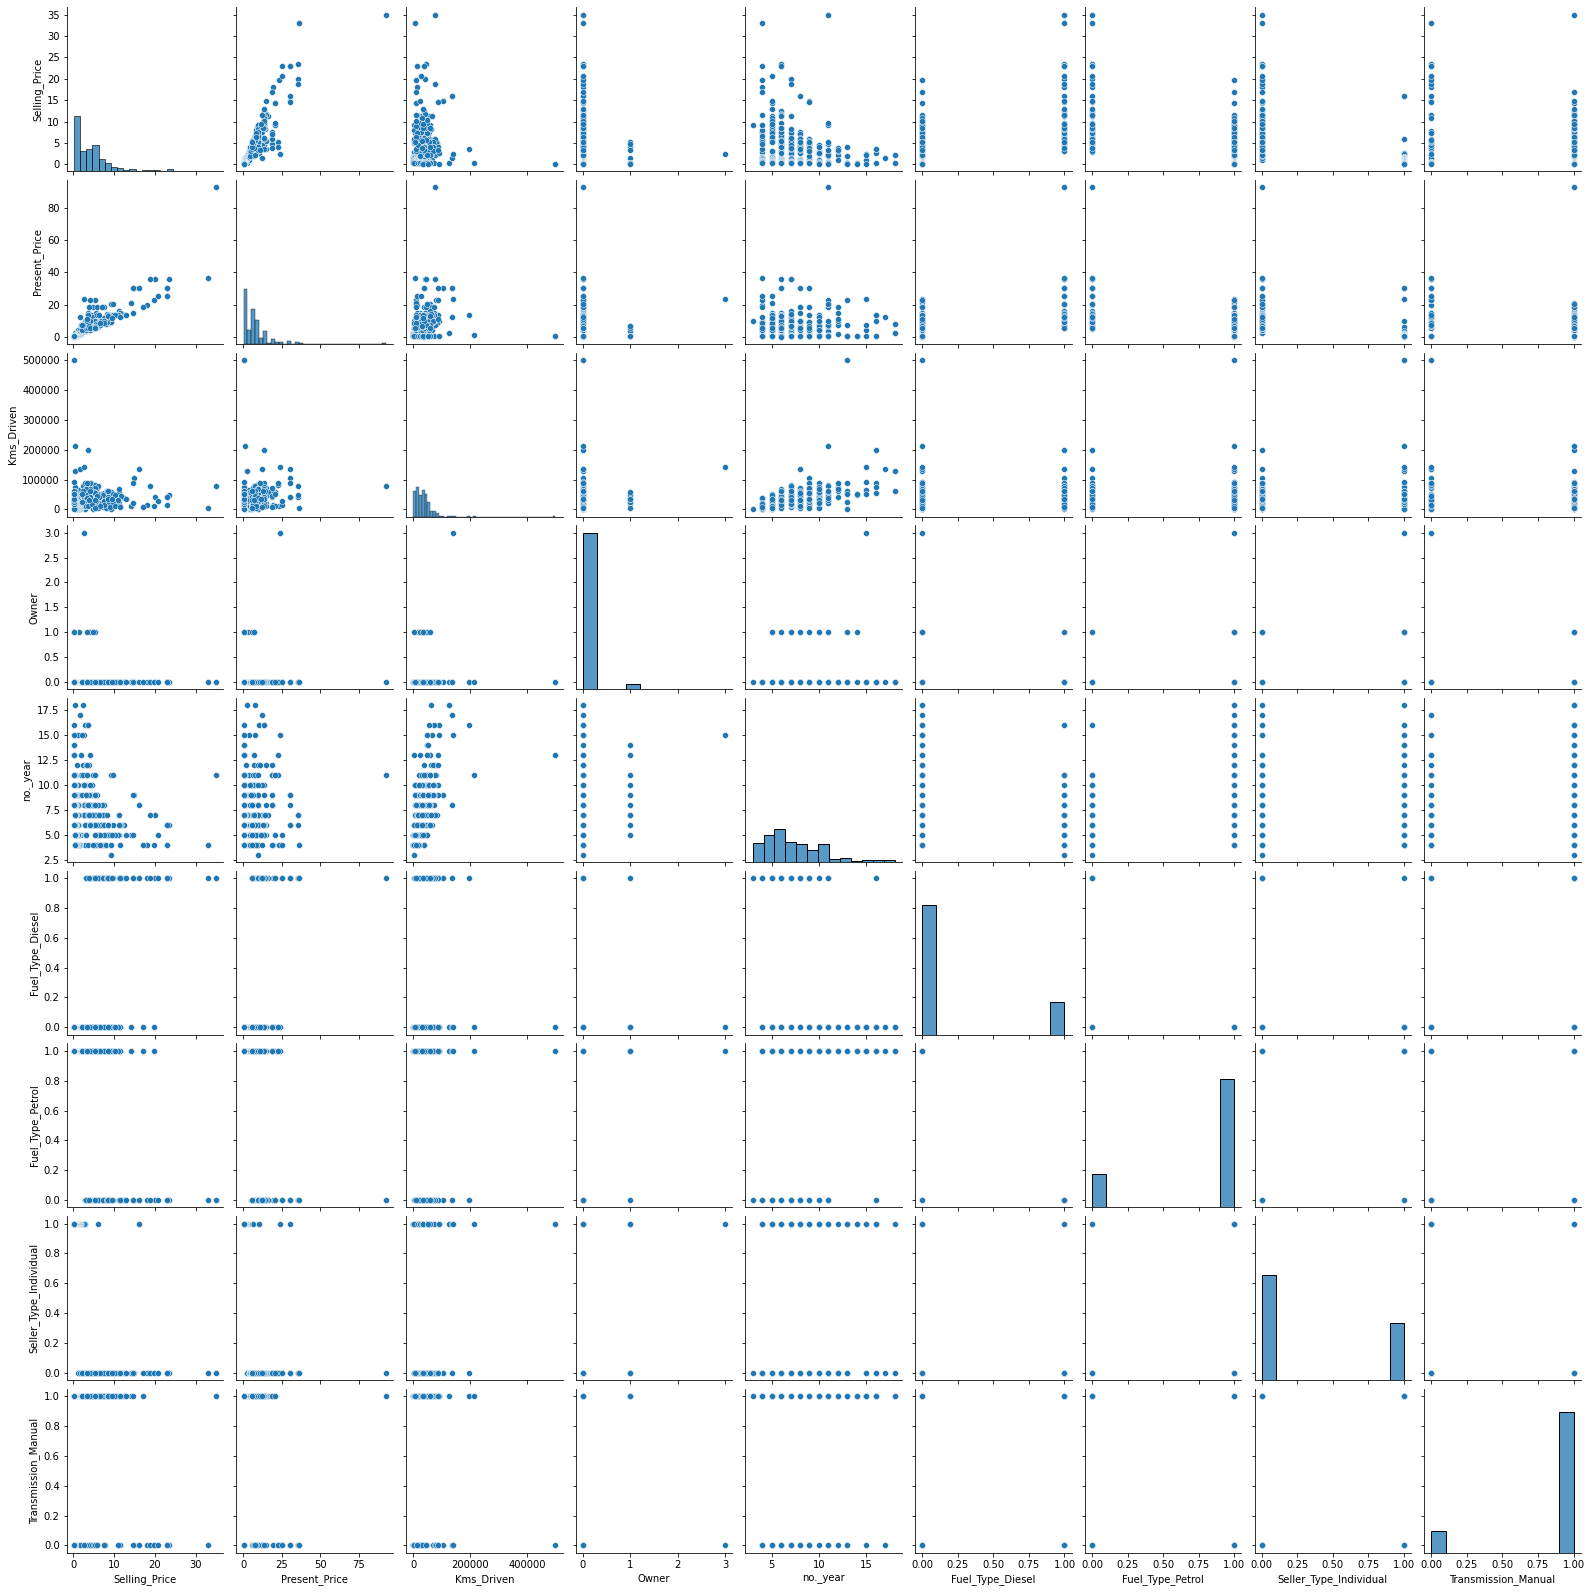

In [17]:
sns.pairplot(final_df)

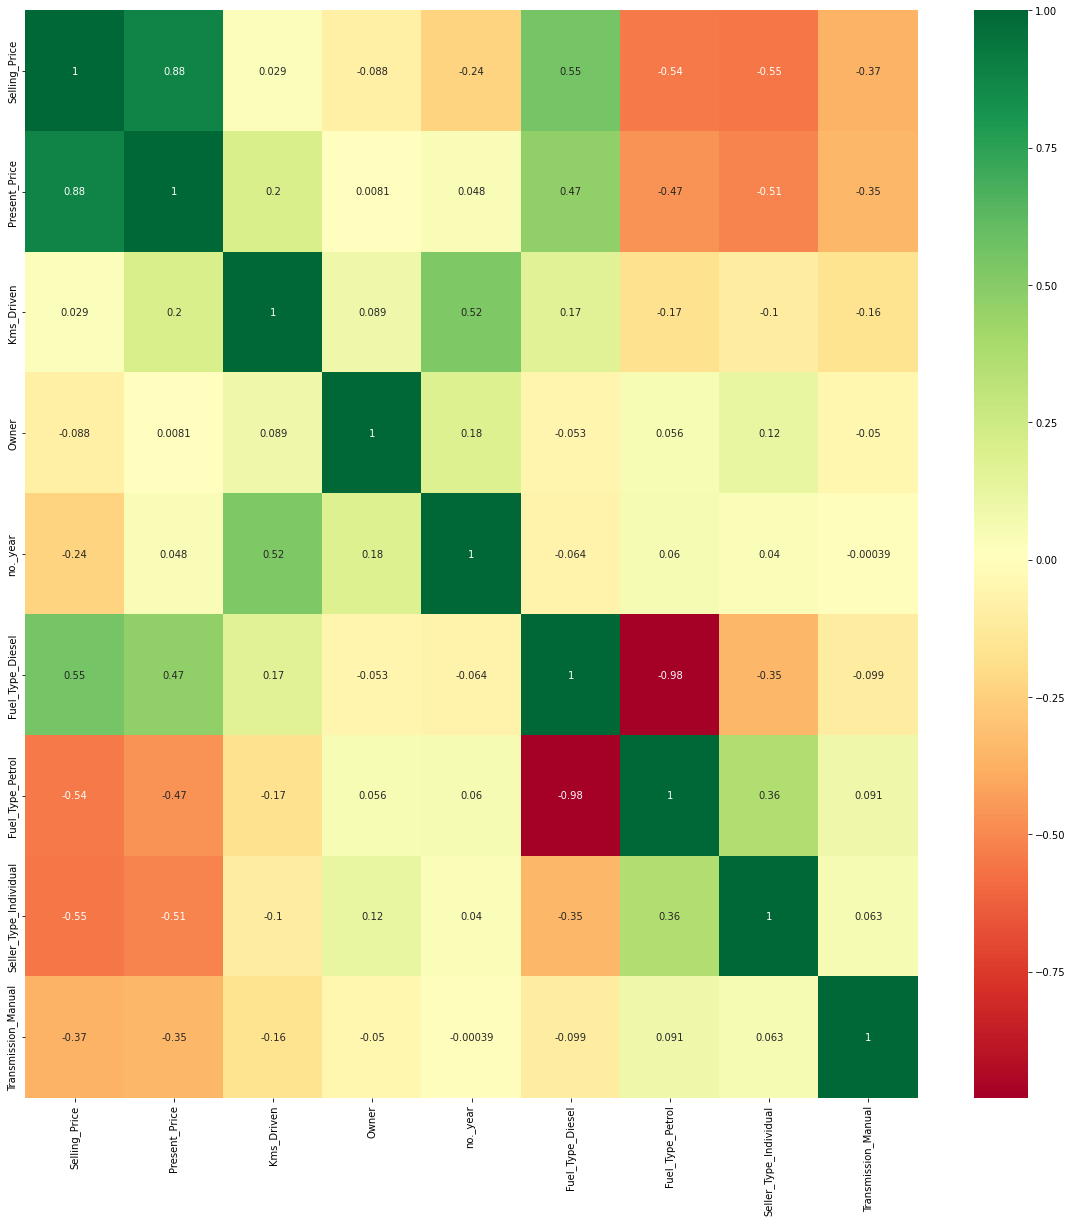

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(final_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [20]:
# independent features and dependent features
X = final_df.iloc[:, 1:]
y = final_df.iloc[:, 0]

In [21]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
## feature important
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [23]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
model.feature_importances_

array([0.34772513, 0.04096427, 0.00037509, 0.07573675, 0.23599015,
       0.00947095, 0.13448727, 0.15525039])

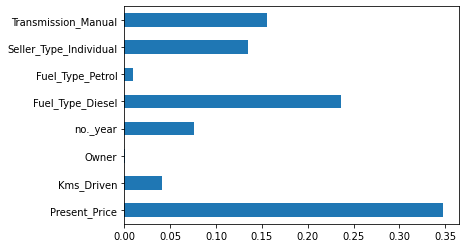

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(5).plot(kind='barh')
feature_importances.plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [30]:
# Randomized Search CV

## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [31]:
## it helps us to find out the best parameters
from sklearn.model_selection import RandomizedSearchCV

In [32]:
## create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=4)

In [39]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
pred = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


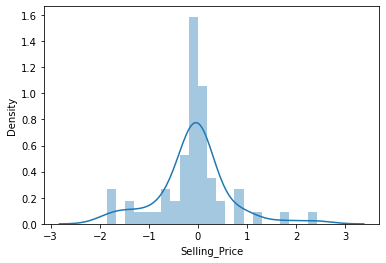

In [41]:
sns.distplot(y_test-pred)

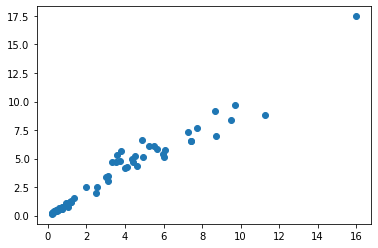

In [42]:
# sns.scatterplot(y_test, pred)
plt.scatter(y_test, pred)